# School Reopening and  Report Card Data

## Contents:
### 01. Import libraries and data
### 02. Merge data
### 03. Export data
### 04. Explore relationships

## 01. Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Ensure the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create path shortcut

path = r'C:\Users\lrutl\OneDrive\Desktop\Advanced Analytics & Dashboard Design\COVID19 School ReOpening and Students'

In [4]:
# Import School Reopening data

sf = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'School_Facility_ReOpening_Survey - clean.csv'))

In [5]:
# Import Report Card data

rc = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'Report_Card_Enrollment_2020-21_School_Year - clean.csv'))

In [6]:
# Import COVID19 Cases data

cc = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'WA_COVID19_Cases_Hospitalizations_Deaths - clean.csv'))

## 02. Merge data

In [12]:
# Check sf data types

sf.dtypes

Unnamed: 0                       int64
Week                            object
DistrictName                    object
DistrictCode                     int64
DistrictOrganizationId           int64
Status                          object
Model_Elementary                object
Model_Middle                    object
Model_High                      object
GradeLevels_Remote_Phasein      object
StudentGroups_Remote_Phasein    object
Other_Remote_Phasein            object
Enrollment_Elementary            int64
FullTimeALE_Elementary           int64
OptOut_Elementary                int64
TypicalInPerson_Elementary       int64
Weekly_Elementary                int64
Enrollment_Middle                int64
FullTimeALE_Middle               int64
OptOut_Middle                    int64
TypicalInPerson_Middle           int64
Weekly_Middle                    int64
Enrollment_High                  int64
FullTimeALE_High                 int64
OptOut_High                      int64
TypicalInPerson_High     

In [13]:
# Check rc data types

rc.dtypes

Unnamed: 0                                   int64
SchoolYear                                  object
OrganizationLevel                           object
County                                      object
DistrictCode                               float64
DistrictName                                object
DistrictOrganizationId                     float64
All Students                                 int64
Female                                       int64
Gender X                                     int64
Male                                         int64
American Indian/ Alaskan Native              int64
Asian                                        int64
Black/ African American                      int64
Hispanic/ Latino of any race(s)              int64
Native Hawaiian/ Other Pacific Islander      int64
Two or More Races                            int64
White                                        int64
English Language Learners                    int64
Highly Capable                 

In [17]:
# Change sf DistrictCode and DistrictOrganizationID to string data type

sf['DistrictCode'] = sf['DistrictCode'].astype('str')

In [18]:
sf['DistrictOrganizationId'] = sf['DistrictOrganizationId'].astype('str')

In [19]:
# Change rc DistrictCode and DistrictOrganizationID to string data type

rc['DistrictCode'] = rc['DistrictCode'].astype('str')

In [20]:
rc['DistrictOrganizationId'] = rc['DistrictOrganizationId'].astype('str')

In [29]:
# Merge School Reopening and Report Card data

sf_rc_merged = (sf.merge(rc, on = ['DistrictName'], indicator = True))

In [30]:
sf_rc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5126 entries, 0 to 5125
Data columns (total 63 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Unnamed: 0_x                             5126 non-null   int64   
 1   Week                                     5126 non-null   object  
 2   DistrictName                             5126 non-null   object  
 3   DistrictCode_x                           5126 non-null   object  
 4   DistrictOrganizationId_x                 5126 non-null   object  
 5   Status                                   5126 non-null   object  
 6   Model_Elementary                         5116 non-null   object  
 7   Model_Middle                             5101 non-null   object  
 8   Model_High                               5073 non-null   object  
 9   GradeLevels_Remote_Phasein               898 non-null    object  
 10  StudentGroups_Remote_Phasein        

In [31]:
sf_rc_merged.shape

(5126, 63)

In [32]:
sf_rc_merged.head()

,Unnamed: 0_x,Week,DistrictName,DistrictCode_x,DistrictOrganizationId_x,Status,Model_Elementary,Model_Middle,Model_High,GradeLevels_Remote_Phasein,...,Non-English Language Learners,Non-Highly Capable,Non-Homeless,Non-Low Income,Non Migrant,Non Military Parent,Non Mobile,Non Section 504,Students without Disabilities,_merge
0,0,1/18/2021,Adna School District,21226,100011,Complete,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,...,591,566,583,418,591,583,572,583,527,both
1,318,1/25/2021,Adna School District,21226,100011,Complete,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,...,591,566,583,418,591,583,572,583,527,both
2,636,2/1/2021,Adna School District,21226,100011,Complete,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,...,591,566,583,418,591,583,572,583,527,both
3,1588,2/22/2021,Adna School District,21226,100011,Complete,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,...,591,566,583,418,591,583,572,583,527,both
4,1906,3/1/2021,Adna School District,21226,100011,Complete,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,...,591,566,583,418,591,583,572,583,527,both


In [33]:
# Update max columns displayed to allow for all columns in rc df

pd.set_option("display.max_columns", 100)

In [35]:
# Check all rows merged

sf_rc_merged.value_counts('_merge')

_merge
both          5126
left_only        0
right_only       0
dtype: int64

In [36]:
sf_rc_merged.head()

,Unnamed: 0_x,Week,DistrictName,DistrictCode_x,DistrictOrganizationId_x,Status,Model_Elementary,Model_Middle,Model_High,GradeLevels_Remote_Phasein,StudentGroups_Remote_Phasein,Other_Remote_Phasein,Enrollment_Elementary,FullTimeALE_Elementary,OptOut_Elementary,TypicalInPerson_Elementary,Weekly_Elementary,Enrollment_Middle,FullTimeALE_Middle,OptOut_Middle,TypicalInPerson_Middle,Weekly_Middle,Enrollment_High,FullTimeALE_High,OptOut_High,TypicalInPerson_High,Weekly_High,Unnamed: 0_y,SchoolYear,OrganizationLevel,County,DistrictCode_y,DistrictOrganizationId_y,All Students,Female,Gender X,Male,American Indian/ Alaskan Native,Asian,Black/ African American,Hispanic/ Latino of any race(s),Native Hawaiian/ Other Pacific Islander,Two or More Races,White,English Language Learners,Highly Capable,Homeless,Low-Income,Migrant,Military Parent,Mobile,Section 504,Students with Disabilities,Non-English Language Learners,Non-Highly Capable,Non-Homeless,Non-Low Income,Non Migrant,Non Military Parent,Non Mobile,Non Section 504,Students without Disabilities,_merge
0,0,1/18/2021,Adna School District,21226,100011,Complete,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,0,216,216,155,0,0,90,155,212,0,0,130,212,15783,2020-21,District,Lewis,21226.0,100011.0,591,293,1,297,5,4,6,45,0,10,521,0,25,8,173,0,8,19,8,64,591,566,583,418,591,583,572,583,527,both
1,318,1/25/2021,Adna School District,21226,100011,Complete,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,0,216,216,155,0,0,90,155,212,0,0,130,212,15783,2020-21,District,Lewis,21226.0,100011.0,591,293,1,297,5,4,6,45,0,10,521,0,25,8,173,0,8,19,8,64,591,566,583,418,591,583,572,583,527,both
2,636,2/1/2021,Adna School District,21226,100011,Complete,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,17,216,216,155,14,14,85,155,212,11,11,126,212,15783,2020-21,District,Lewis,21226.0,100011.0,591,293,1,297,5,4,6,45,0,10,521,0,25,8,173,0,8,19,8,64,591,566,583,418,591,583,572,583,527,both
3,1588,2/22/2021,Adna School District,21226,100011,Complete,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,17,216,216,155,14,14,85,155,212,11,11,126,212,15783,2020-21,District,Lewis,21226.0,100011.0,591,293,1,297,5,4,6,45,0,10,521,0,25,8,173,0,8,19,8,64,591,566,583,418,591,583,572,583,527,both
4,1906,3/1/2021,Adna School District,21226,100011,Complete,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,15,216,216,155,0,14,85,155,212,5,11,126,212,15783,2020-21,District,Lewis,21226.0,100011.0,591,293,1,297,5,4,6,45,0,10,521,0,25,8,173,0,8,19,8,64,591,566,583,418,591,583,572,583,527,both


In [37]:
# Drop columns not needed for analysis

sf_rc_merged = sf_rc_merged.drop(columns = ['Unnamed: 0_x','DistrictCode_x','DistrictOrganizationId_x','Status','Unnamed: 0_y','SchoolYear','DistrictCode_y','DistrictOrganizationId_y','_merge'])

In [38]:
sf_rc_merged.head()

,Week,DistrictName,Model_Elementary,Model_Middle,Model_High,GradeLevels_Remote_Phasein,StudentGroups_Remote_Phasein,Other_Remote_Phasein,Enrollment_Elementary,FullTimeALE_Elementary,OptOut_Elementary,TypicalInPerson_Elementary,Weekly_Elementary,Enrollment_Middle,FullTimeALE_Middle,OptOut_Middle,TypicalInPerson_Middle,Weekly_Middle,Enrollment_High,FullTimeALE_High,OptOut_High,TypicalInPerson_High,Weekly_High,OrganizationLevel,County,All Students,Female,Gender X,Male,American Indian/ Alaskan Native,Asian,Black/ African American,Hispanic/ Latino of any race(s),Native Hawaiian/ Other Pacific Islander,Two or More Races,White,English Language Learners,Highly Capable,Homeless,Low-Income,Migrant,Military Parent,Mobile,Section 504,Students with Disabilities,Non-English Language Learners,Non-Highly Capable,Non-Homeless,Non-Low Income,Non Migrant,Non Military Parent,Non Mobile,Non Section 504,Students without Disabilities
0,1/18/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,0,216,216,155,0,0,90,155,212,0,0,130,212,District,Lewis,591,293,1,297,5,4,6,45,0,10,521,0,25,8,173,0,8,19,8,64,591,566,583,418,591,583,572,583,527
1,1/25/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,0,216,216,155,0,0,90,155,212,0,0,130,212,District,Lewis,591,293,1,297,5,4,6,45,0,10,521,0,25,8,173,0,8,19,8,64,591,566,583,418,591,583,572,583,527
2,2/1/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,17,216,216,155,14,14,85,155,212,11,11,126,212,District,Lewis,591,293,1,297,5,4,6,45,0,10,521,0,25,8,173,0,8,19,8,64,591,566,583,418,591,583,572,583,527
3,2/22/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,17,216,216,155,14,14,85,155,212,11,11,126,212,District,Lewis,591,293,1,297,5,4,6,45,0,10,521,0,25,8,173,0,8,19,8,64,591,566,583,418,591,583,572,583,527
4,3/1/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,15,216,216,155,0,14,85,155,212,5,11,126,212,District,Lewis,591,293,1,297,5,4,6,45,0,10,521,0,25,8,173,0,8,19,8,64,591,566,583,418,591,583,572,583,527


In [58]:
# Check sf_rc_merged data types

sf_rc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5126 entries, 0 to 5125
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Week                                     5126 non-null   object
 1   DistrictName                             5126 non-null   object
 2   Model_Elementary                         5116 non-null   object
 3   Model_Middle                             5101 non-null   object
 4   Model_High                               5073 non-null   object
 5   GradeLevels_Remote_Phasein               898 non-null    object
 6   StudentGroups_Remote_Phasein             998 non-null    object
 7   Other_Remote_Phasein                     248 non-null    object
 8   Enrollment_Elementary                    5126 non-null   int64 
 9   FullTimeALE_Elementary                   5126 non-null   int64 
 10  OptOut_Elementary                        5126 non-null   int

In [60]:
# Check cc data types

cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        749 non-null    int64  
 1   County            749 non-null    object 
 2   Week              749 non-null    object 
 3   ProbableCases     749 non-null    int64  
 4   ConfirmedCases    749 non-null    int64  
 5   7-Day Count       749 non-null    int64  
 6   7-Day Average     749 non-null    float64
 7   Age 0-19          749 non-null    int64  
 8   Age 20-34         749 non-null    int64  
 9   Age 35-49         749 non-null    int64  
 10  Age 50-64         749 non-null    int64  
 11  Age 65-79         749 non-null    int64  
 12  Age 80+           749 non-null    int64  
 13  UnknownAge        749 non-null    int64  
 14  14-Day Count      749 non-null    int64  
 15  14-Day Case Rate  749 non-null    float64
dtypes: float64(2), int64(12), object(2)
memory u

In [61]:
# Change WeekStartDate to Week

cc.rename(columns = {'WeekStartDate' : 'Week'}, inplace = True)

In [62]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        749 non-null    int64  
 1   County            749 non-null    object 
 2   Week              749 non-null    object 
 3   ProbableCases     749 non-null    int64  
 4   ConfirmedCases    749 non-null    int64  
 5   7-Day Count       749 non-null    int64  
 6   7-Day Average     749 non-null    float64
 7   Age 0-19          749 non-null    int64  
 8   Age 20-34         749 non-null    int64  
 9   Age 35-49         749 non-null    int64  
 10  Age 50-64         749 non-null    int64  
 11  Age 65-79         749 non-null    int64  
 12  Age 80+           749 non-null    int64  
 13  UnknownAge        749 non-null    int64  
 14  14-Day Count      749 non-null    int64  
 15  14-Day Case Rate  749 non-null    float64
dtypes: float64(2), int64(12), object(2)
memory u

In [63]:
# Merge sf_rc_merged and COVID19 Cases data

sf_rc_cc_merged = (sf_rc_merged.merge(cc, on = ['County','Week'], indicator = True))

In [64]:
sf_rc_cc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5058 entries, 0 to 5057
Data columns (total 69 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Week                                     5058 non-null   object  
 1   DistrictName                             5058 non-null   object  
 2   Model_Elementary                         5048 non-null   object  
 3   Model_Middle                             5033 non-null   object  
 4   Model_High                               5005 non-null   object  
 5   GradeLevels_Remote_Phasein               894 non-null    object  
 6   StudentGroups_Remote_Phasein             992 non-null    object  
 7   Other_Remote_Phasein                     246 non-null    object  
 8   Enrollment_Elementary                    5058 non-null   int64   
 9   FullTimeALE_Elementary                   5058 non-null   int64   
 10  OptOut_Elementary                   

In [65]:
# Check all rows merged

sf_rc_cc_merged.value_counts('_merge')

_merge
both          5058
left_only        0
right_only       0
dtype: int64

In [66]:
sf_rc_cc_merged.shape

(5058, 69)

## 03. Export data

In [67]:
# Export data as csv file

sf_rc_merged.to_csv(os.path.join(path,'02 Data','Prepared data','sf_rc_merged.csv'))

In [68]:
# Export data as csv file

sf_rc_cc_merged.to_csv(os.path.join(path,'02 Data','Prepared data','sf_rc_cc_merged.csv'))

## 04. Explore relationships

In [69]:
# sf_rc_merged correltation table 

sf_rc_merged.corr()

,Enrollment_Elementary,FullTimeALE_Elementary,OptOut_Elementary,TypicalInPerson_Elementary,Weekly_Elementary,Enrollment_Middle,FullTimeALE_Middle,OptOut_Middle,TypicalInPerson_Middle,Weekly_Middle,Enrollment_High,FullTimeALE_High,OptOut_High,TypicalInPerson_High,Weekly_High,All Students,Female,Gender X,Male,American Indian/ Alaskan Native,Asian,Black/ African American,Hispanic/ Latino of any race(s),Native Hawaiian/ Other Pacific Islander,Two or More Races,White,English Language Learners,Highly Capable,Homeless,Low-Income,Migrant,Military Parent,Mobile,Section 504,Students with Disabilities,Non-English Language Learners,Non-Highly Capable,Non-Homeless,Non-Low Income,Non Migrant,Non Military Parent,Non Mobile,Non Section 504,Students without Disabilities
Enrollment_Elementary,1.000000,0.109415,0.666440,0.672200,0.740355,0.905567,0.080100,0.565771,0.591260,0.595346,0.906625,0.155500,0.348173,0.568995,0.578386,0.930922,0.930342,0.245957,0.931327,0.352584,0.663194,0.694815,0.717023,0.661060,0.868478,0.861471,0.762593,0.747550,0.718697,0.823939,0.178204,0.302964,0.871805,0.812049,0.915633,0.926990,0.930866,0.930668,0.862207,0.930757,0.929156,0.931048,0.930812,0.929918
FullTimeALE_Elementary,0.109415,1.000000,0.011567,0.077378,0.104151,0.140709,0.942735,0.030425,0.073797,0.095498,0.117694,0.522467,0.006444,0.085174,0.103764,0.133296,0.136073,0.067077,0.130494,0.216958,0.005709,0.044824,0.085658,0.021341,0.085634,0.185782,0.044927,0.031897,0.049471,0.133561,0.060269,0.049302,0.268421,0.087556,0.135115,0.144561,0.140609,0.134569,0.111361,0.131907,0.132677,0.128881,0.134721,0.132525
OptOut_Elementary,0.666440,0.011567,1.000000,0.628326,0.595931,0.706355,0.010643,0.780730,0.524170,0.492013,0.687735,0.079999,0.533857,0.483730,0.447927,0.715505,0.713827,0.198124,0.716922,0.231750,0.675381,0.590221,0.525678,0.530967,0.664225,0.603187,0.639164,0.629439,0.539262,0.577311,0.038876,0.242667,0.644906,0.661271,0.676636,0.702722,0.710116,0.715632,0.706134,0.719233,0.713541,0.716379,0.713559,0.718983
TypicalInPerson_Elementary,0.672200,0.077378,0.628326,1.000000,0.820174,0.682018,0.042798,0.601891,0.760721,0.706916,0.691557,0.116511,0.353000,0.748974,0.687544,0.701189,0.701062,0.176174,0.701254,0.306287,0.371169,0.506995,0.548187,0.499926,0.676570,0.690969,0.527270,0.490035,0.641725,0.672420,0.191231,0.233652,0.686255,0.565164,0.713058,0.706901,0.708262,0.698539,0.609211,0.698825,0.699521,0.700370,0.703437,0.696769
Weekly_Elementary,0.740355,0.104151,0.595931,0.820174,1.000000,0.759749,0.061712,0.595793,0.785259,0.868031,0.772650,0.140217,0.353754,0.772492,0.842796,0.776566,0.777802,0.186394,0.775397,0.357320,0.298368,0.462697,0.637478,0.544617,0.742195,0.809804,0.548118,0.516403,0.692205,0.775900,0.276975,0.296968,0.778503,0.611604,0.797684,0.789487,0.786962,0.774085,0.650487,0.771386,0.772355,0.775089,0.779774,0.770422
Enrollment_Middle,0.905567,0.140709,0.706355,0.682018,0.759749,1.000000,0.125064,0.622316,0.648619,0.655541,0.967455,0.186742,0.370280,0.610495,0.605688,0.982069,0.982379,0.262028,0.981618,0.369616,0.706239,0.694185,0.775589,0.675345,0.899507,0.906420,0.799604,0.811648,0.736777,0.851130,0.214062,0.318468,0.934034,0.865926,0.956248,0.978820,0.979767,0.982326,0.923611,0.980871,0.980277,0.981760,0.981489,0.982529
FullTimeALE_Middle,0.080100,0.942735,0.010643,0.042798,0.061712,0.125064,1.000000,0.030583,0.051940,0.064777,0.096270,0.675711,0.005219,0.051073,0.062742,0.107879,0.111727,0.057867,0.104089,0.244004,0.000377,0.045563,0.060657,0.036458,0.067446,0.152972,0.028275,0.017592,0.022720,0.112112,0.036181,0.043384,0.268452,0.062704,0.110374,0.118484,0.114598,0.109333,0.087007,0.107250,0.107162,0.102724,0.109441,0.107094
OptOut_Middle,0.565771,0.030425,0.780730,0.601891,0.595793,0.622316,0.030583,1.000000,0.634049,0.600137,0.591130,0.106013,0.625787,0.554078,0.518323,0.614782,0.613246,0.180166,0.616031,0.214872,0.465653,0.503369,0.507282,0.500810,0.576515,0.526748,0.541821,0.542231,0.445729,0.544948,0.091651,0.247279,0.591441,0.542300

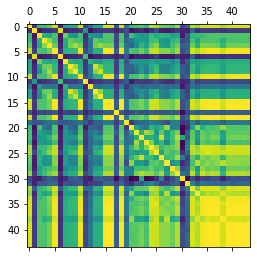

In [74]:
# sf_rc_merged correlation heatmap using matplotlib

plt.matshow(sf_rc_merged.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

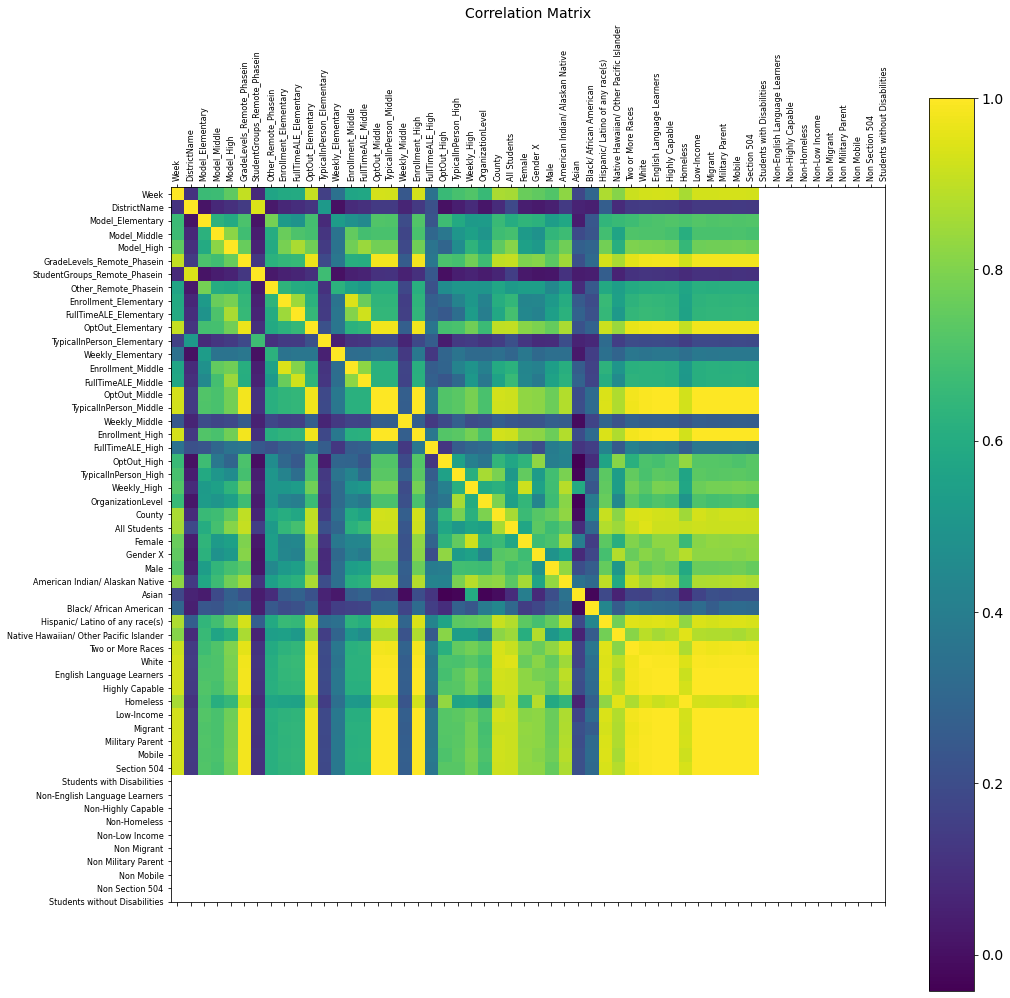

In [80]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(16,16)) # figure size 
plt.matshow(sf_rc_merged.corr(), fignum=f.number) # type of plot
plt.xticks(range(sf_rc_merged.shape[1]), sf_rc_merged.columns, fontsize=8, rotation=90) # x axis labels
plt.yticks(range(sf_rc_merged.shape[1]), sf_rc_merged.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [81]:
# Create a correlation heatmap using seaborn
# Create a subset with columns for correltation heatmap

sub1 = sf_rc_merged[['OptOut_Elementary', 'OptOut_Middle', 'OptOut_High', 'White','Highly Capable', 'Homeless', 'Low-Income', 'Migrant', 'English Language Learners']]

In [82]:
sub1

,OptOut_Elementary,OptOut_Middle,OptOut_High,White,Highly Capable,Homeless,Low-Income,Migrant,English Language Learners
0,0,0,0,521,25,8,173,0,0
1,0,0,0,521,25,8,173,0,0
2,17,14,11,521,25,8,173,0,0
3,17,14,11,521,25,8,173,0,0
4,15,14,11,521,25,8,173,0,0
...,...,...,...,...,...,...,...,...,...
5121,10,2,0,72,5,2,46,0,5
5122,5,1,0,72,5,2,46,0,5
5123,5,1,0,72,5,2,46,0,5
5124,5,1,0,72,5,2,46,0,5


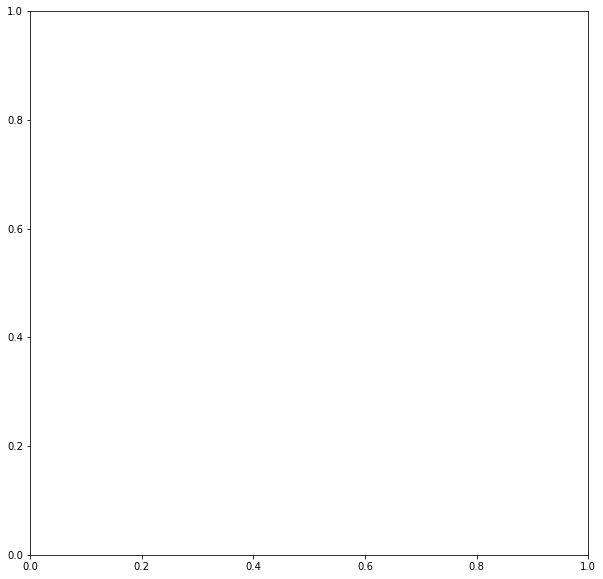

In [83]:
# Create a subplot with matplotlib. 

f,ax = plt.subplots(figsize=(10,10))

In [84]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr1 = sns.heatmap(sub1.corr(), annot = True, ax = ax) 

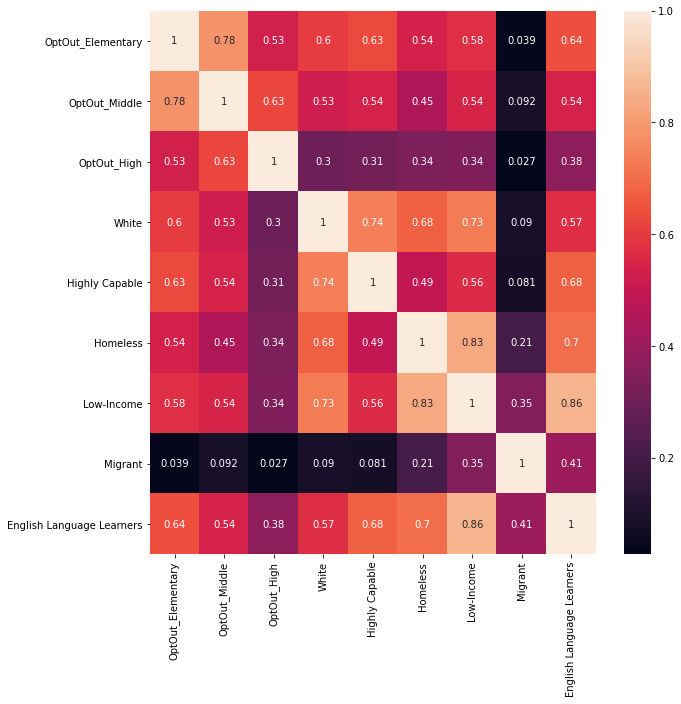

In [85]:
corr1.figure

In [98]:
# Create a correlation heatmap using seaborn
# Create a subset with columns for correltation heatmap

sub2 = sf_rc_cc_merged[['TypicalInPerson_Elementary', 'TypicalInPerson_Middle', 'TypicalInPerson_High', 'ConfirmedCases','7-Day Count', '7-Day Average']]

In [99]:
sub2

,TypicalInPerson_Elementary,TypicalInPerson_Middle,TypicalInPerson_High,ConfirmedCases,7-Day Count,7-Day Average
0,216,90,130,154,167,23.86
1,760,50,80,154,167,23.86
2,643,328,607,154,167,23.86
3,0,0,0,154,167,23.86
4,197,82,112,154,167,23.86
...,...,...,...,...,...,...
5053,154,72,142,1,1,0.14
5054,154,72,142,4,7,1.00
5055,154,72,142,11,13,1.86
5056,154,72,142,7,7,1.00


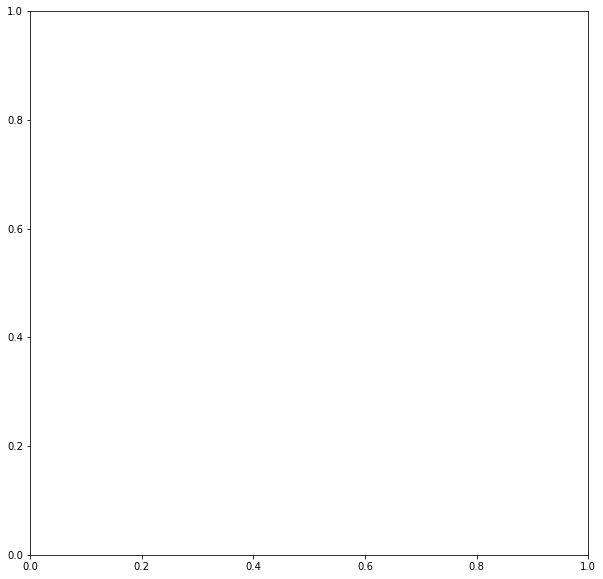

In [100]:
# Create a subplot with matplotlib. 

f,ax = plt.subplots(figsize=(10,10))

In [101]:
# Create the correlation heatmap in seaborn 

corr2 = sns.heatmap(sub2.corr(), annot = True, ax = ax) 

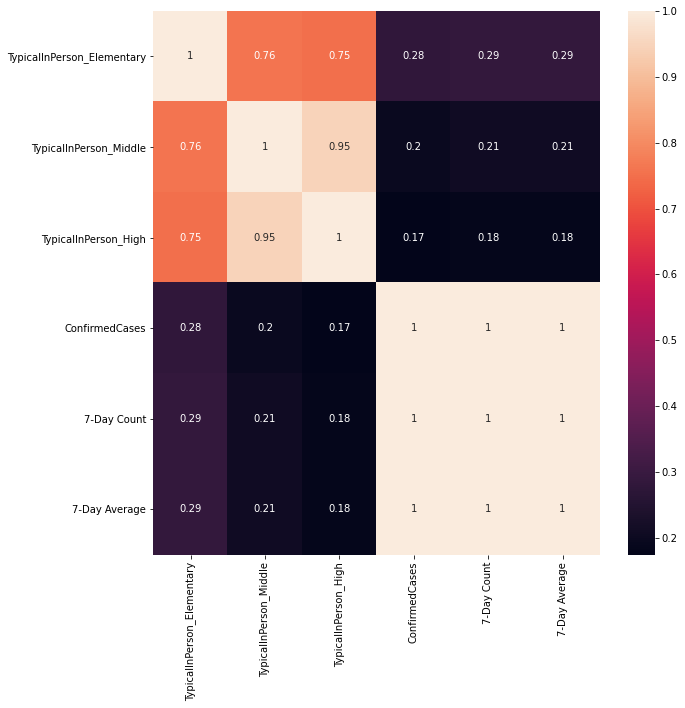

In [102]:
corr2.figure

In [103]:
sf_rc_merged.value_counts('DistrictName')

DistrictName
Zillah School District                  19
Stanwood-Camano School District         19
Royal School District                   19
Lake Stevens School District            19
Lake Quinault School District           19
                                        ..
Evaline School District                  6
West Valley School District (Yakima)     4
North River School District              4
Kahlotus School District                 3
Lummi Tribal Agency                      2
Length: 308, dtype: int64